#  *REAL OR FAKE NEWS ANALYSIS*

# Loading and Combining datasets

In [1]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Detect encoding of the file
with open('C:\\Users\\vaish\\Downloads\\True.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read())  
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
# Load the datasets
true_news = pd.read_csv("C:\\Users\\vaish\\Downloads\\True.csv", encoding='ISO-8859-1', on_bad_lines='skip')
fake_news = pd.read_csv("C:\\Users\\vaish\\Downloads\\Fake.csv", encoding='ISO-8859-1', on_bad_lines='skip')


In [4]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
# Add a label column : 1 for real news, 0 for fake news
true_news['label'] = 1
fake_news['label'] = 0

In [7]:
# Combine the datasets into one DataFrame
news_data = pd.concat([true_news, fake_news], ignore_index=True)

In [8]:
# Check the first few rows of the combined dataset
news_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
# Check for null values
print(news_data.isnull().sum())


title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [10]:
# Check the shape of dataset
news_data.shape

(44897, 5)

In [11]:
news_data.describe(include='all')

,title,text,subject,date,label
count,44897,44897,44897,44897,44897.000000
unique,38728,38645,8,2397,NaN
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",NaN
freq,14,627,11271,182,NaN
mean,NaN,NaN,NaN,NaN,0.477003
std,NaN,NaN,NaN,NaN,0.499476
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,1.000000


# Text Preprocessing

Clean the text by removing punctuation, stopwords, and performing lemmatization.

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [14]:
# Function for cleaning text
def clean_text(text):
    # Remove punctuation and lowercase the text
    text = re.sub(r'[^\w\s]', '', text.lower())
    
    # Tokenization and remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    
    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

In [15]:
# Apply cleaning to the text column 
news_data['cleaned_text'] = news_data['text'].apply(clean_text)

# Check cleaned text
print(news_data['cleaned_text'].head())

0    washington reuters head conservative republica...
1    washington reuters transgender people allowed ...
2    washington reuters special counsel investigati...
3    washington reuters trump campaign adviser geor...
4    seattlewashington reuters president donald tru...
Name: cleaned_text, dtype: object


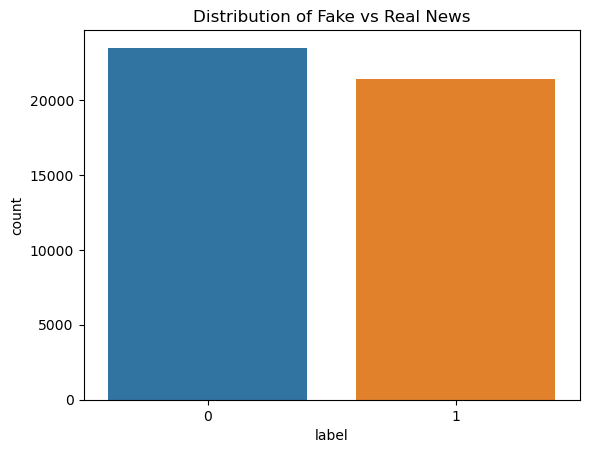

In [16]:
# Plot the distribution of fake vs real news
sns.countplot(x='label', data=news_data)
plt.title('Distribution of Fake vs Real News')
plt.show()

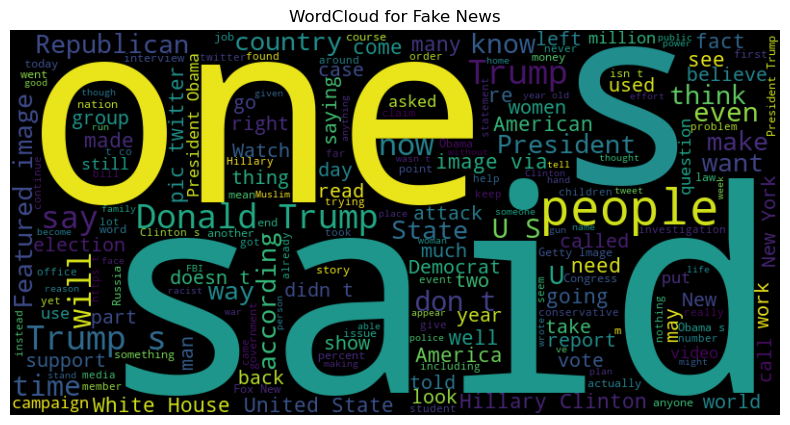

In [17]:
from wordcloud import WordCloud


# WordCloud for Fake News
fake_text = ' '.join(fake_news['text'].values)
wordcloud_fake = WordCloud(width=800, height=400).generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('WordCloud for Fake News')
plt.axis('off')
plt.show()



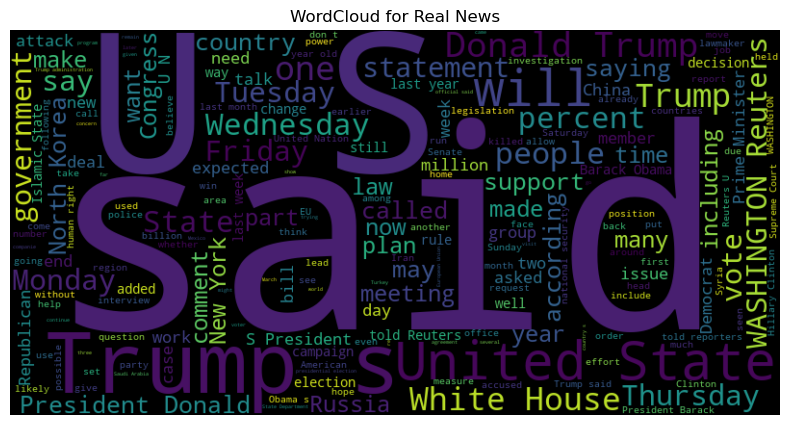

In [18]:
# WordCloud for Real News
real_text = ' '.join(true_news['text'].values)
wordcloud_real = WordCloud(width=800, height=400).generate(real_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('WordCloud for Real News')
plt.axis('off')
plt.show()


# Sentiment Analysis

We'll perform sentiment analysis using TextBlob.


In [19]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
news_data['sentiment'] = news_data['cleaned_text'].apply(get_sentiment)

# Check sentiment scores
print(news_data[['cleaned_text', 'sentiment']].head())


                                        cleaned_text  sentiment
0  washington reuters head conservative republica...   0.027671
1  washington reuters transgender people allowed ...   0.094533
2  washington reuters special counsel investigati...   0.127165
3  washington reuters trump campaign adviser geor...   0.031498
4  seattlewashington reuters president donald tru...   0.032500


# N-Gram Analysis

This step includes extracting bigrams (two-word combinations) from the dataset and displaying the most common ones.


In [20]:
from nltk import ngrams
from collections import Counter
from nltk.tokenize import word_tokenize


# Define a function to extract n-grams
def get_ngrams(text, n=1):
    tokens = word_tokenize(text)
    return list(ngrams(tokens, n))

# Extracting Bigrams (n=2) from the news dataset
news_data['bigrams'] = news_data['text'].apply(lambda x: get_ngrams(x, 2))

# Flatten the list of bigrams and find the most common ones
bigrams_flat = [item for sublist in news_data['bigrams'] for item in sublist]
common_bigrams = Counter(bigrams_flat).most_common(10)

# Print the most common bigrams
print("Most common bigrams:", common_bigrams)


Most common bigrams: [(('of', 'the'), 100442), (('.', 'The'), 77697), (('in', 'the'), 76713), ((',', 'the'), 56923), ((',', 'and'), 56222), (('to', 'the'), 49027), (('on', 'the'), 33980), ((',', 'a'), 31128), (('for', 'the'), 30534), (('in', 'a'), 26595)]


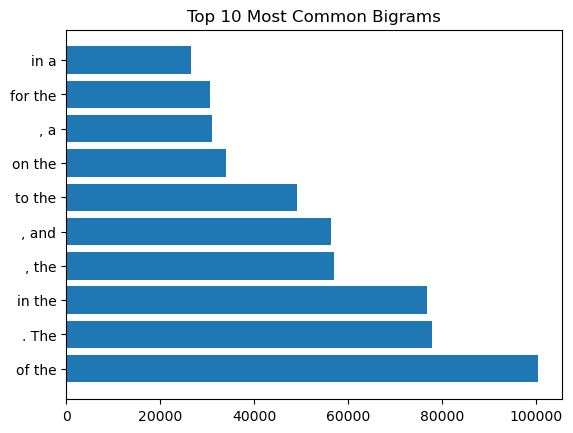

In [21]:
# Plot the most common bigrams
bigrams, counts = zip(*common_bigrams)
bigrams = [' '.join(gram) for gram in bigrams]
plt.barh(bigrams, counts)
plt.title('Top 10 Most Common Bigrams')
plt.show()


# Model Training (Logistic Regression and Naive Bayes)



In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [23]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_df=0.7)

# Splitting the data
X = news_data['text']
y = news_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Build a pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', LogisticRegression())
])


In [25]:
# Train the model
pipeline.fit(X_train, y_train)



Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('clf', LogisticRegression())])

In [26]:
# Make predictions
y_pred = pipeline.predict(X_test)


In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 98.63%


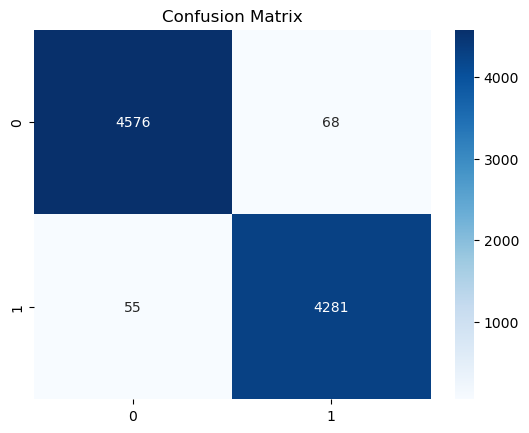

In [28]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4644
           1       0.98      0.99      0.99      4336

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Save the trained model

In [37]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)